In [59]:
# Essentials
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [61]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [62]:
data = pd.read_csv("Data/heart_2020_cleaned.csv")

In [63]:
data

HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0                No  16.60     Yes              No     No             3.0   
1                No  20.34      No              No    Yes             0.0   
2                No  26.58     Yes              No     No            20.0   
3                No  24.21      No              No     No             0.0   
4                No  23.71      No              No     No            28.0   
...             ...    ...     ...             ...    ...             ...   
319790          Yes  27.41     Yes              No     No             7.0   
319791           No  29.84     Yes              No     No             0.0   
319792           No  24.24      No              No     No             0.0   
319793           No  32.81      No              No     No             0.0   
319794           No  46.56      No              No     No             0.0   

        MentalHealth DiffWalking     Sex  AgeCategory      Race Diabetic  \
0               30.0          No  Female        55-59     White      Yes   
1                0.0          No  Female  80 or older     White       No   
2               30.0          No    Male        65-69     White      Yes   
3                0.0          No  Female        75-79     White       No   
4                0.0         Yes  Female        40-44     White       No   
...              ...         ...     ...          ...       ...      ...   
319790           0.0         Yes    Male        60-64  Hispanic      Yes   
319791           0.0          No    Male        35-39  Hispanic       No   
319792           0.0          No  Female        45-49  Hispanic       No   
319793           0.0          No  Female        25-29  Hispanic       No   
319794           0.0          No  Female  80 or older  Hispanic       No   

       PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
0                   Yes  Very good        5.0    Yes            No        Yes  
1                   Yes  Very good        7.0     No            No         No  
2                   Yes       Fair        8.0    Yes            No         No  
3                    No       Good        6.0     No            No        Yes  
4                   Yes  Very good        8.0     No            No         No  
...                 ...        ...        ...    ...           ...        ...  
319790               No       Fair        6.0    Yes            No         No  
319791              Yes  Very good        5.0    Yes            No         No  
319792              Yes       Good        6.0     No            No         No  
319793               No       Good       12.0     No            No         No  
319794              Yes       Good        8.0     No            No         No  

[319795 rows x 18 columns]

In [64]:
data.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [65]:
data.shape

(319795, 18)

In [66]:
data.describe().round(2)

BMI  PhysicalHealth  MentalHealth  SleepTime
count  319795.00       319795.00     319795.00  319795.00
mean       28.33            3.37          3.90       7.10
std         6.36            7.95          7.96       1.44
min        12.02            0.00          0.00       1.00
25%        24.03            0.00          0.00       6.00
50%        27.34            0.00          0.00       7.00
75%        31.42            2.00          3.00       8.00
max        94.85           30.00         30.00      24.00

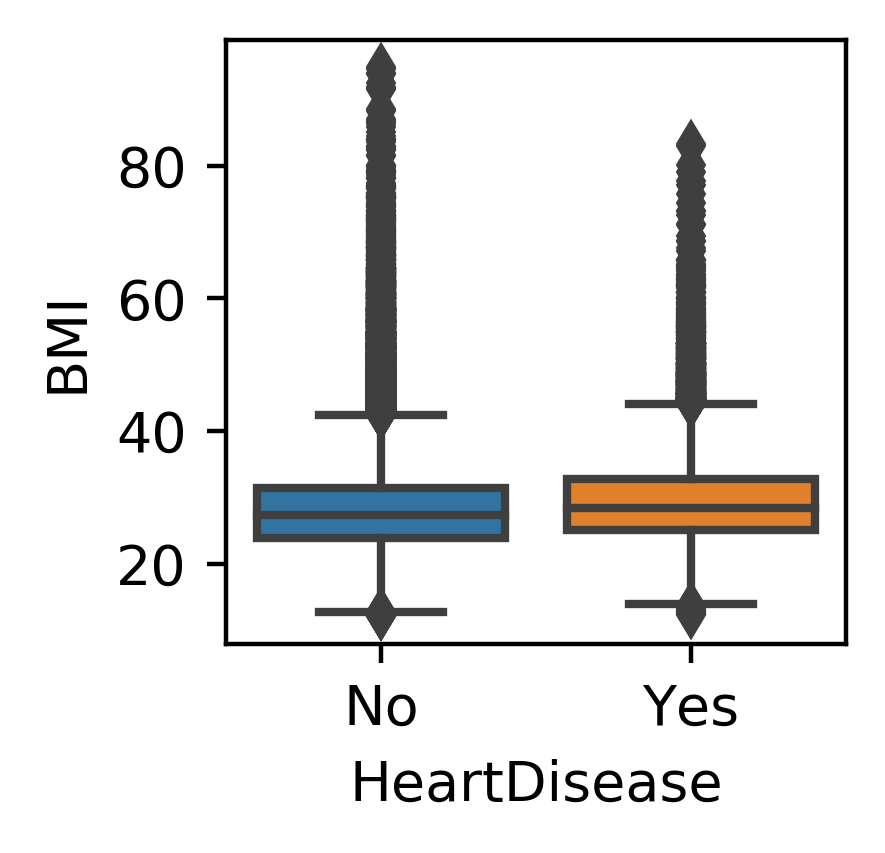

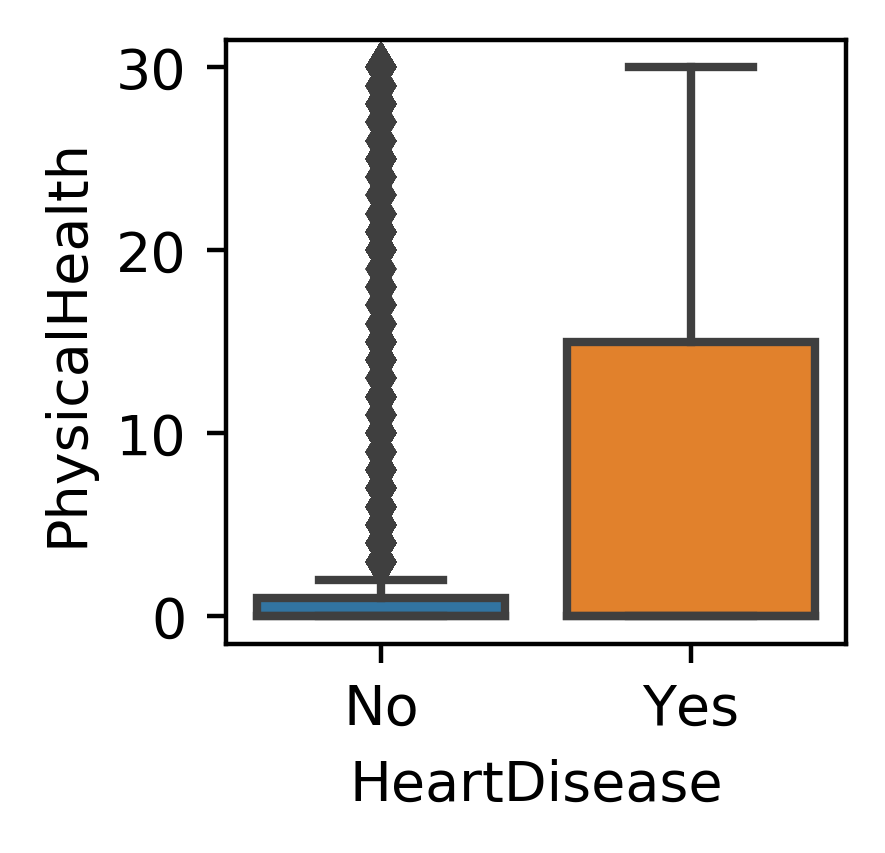

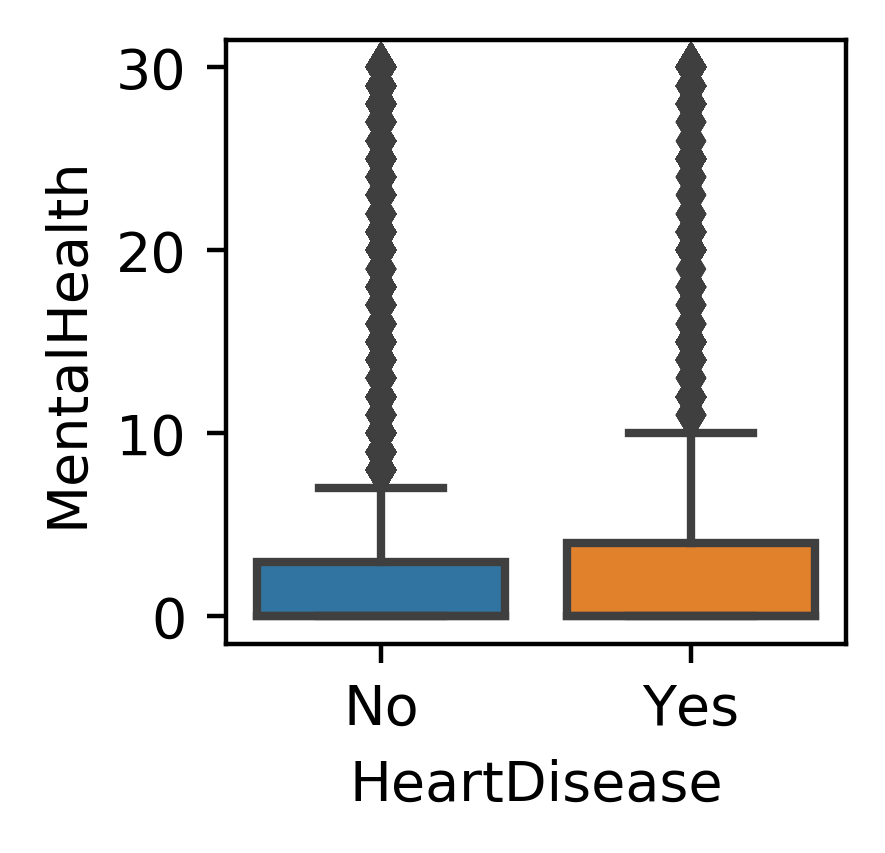

In [67]:
numeric_variables = ['BMI', 'PhysicalHealth', 'MentalHealth']
for i in numeric_variables:
    plt.figure(figsize=(2, 2), dpi=200)
    sns.boxplot(data = data, x = 'HeartDisease', y = i)
    plt.show()

In [68]:
data.isna().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

(array([3.3000e+01, 5.3000e+01, 9.2000e+01, 2.0100e+02, 4.3000e+02,
        7.5800e+02, 1.5480e+03, 2.6370e+03, 4.4750e+03, 7.0570e+03,
        9.9330e+03, 1.2938e+04, 1.3329e+04, 1.6820e+04, 2.3080e+04,
        1.8903e+04, 1.9698e+04, 1.9301e+04, 2.0228e+04, 1.7876e+04,
        1.7682e+04, 1.4602e+04, 1.2470e+04, 1.1889e+04, 1.0169e+04,
        9.2820e+03, 7.6900e+03, 6.2750e+03, 6.1990e+03, 4.6050e+03,
        4.4030e+03, 3.7440e+03, 3.0510e+03, 2.4440e+03, 2.4350e+03,
        1.8660e+03, 1.6930e+03, 1.5430e+03, 1.2740e+03, 8.7400e+02,
        9.3900e+02, 6.8100e+02, 7.7500e+02, 5.2400e+02, 4.3300e+02,
        4.2200e+02, 3.3100e+02, 3.6000e+02, 1.5600e+02, 2.6700e+02,
        1.2500e+02, 2.2900e+02, 7.8000e+01, 1.2700e+02, 7.0000e+01,
        9.3000e+01, 6.9000e+01, 4.5000e+01, 6.4000e+01, 3.7000e+01,
        5.8000e+01, 3.4000e+01, 3.9000e+01, 3.3000e+01, 2.0000e+01,
        1.8000e+01, 1.2000e+01, 1.6000e+01, 1.9000e+01, 1.2000e+01,
        9.0000e+00, 8.0000e+00, 1.7000e+01, 1.20

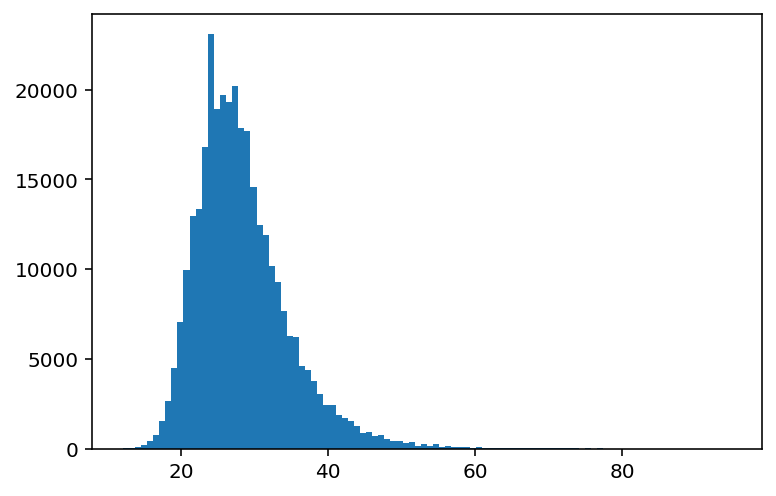

In [69]:
plt.hist(data['BMI'], bins=100)

(array([298018.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
      

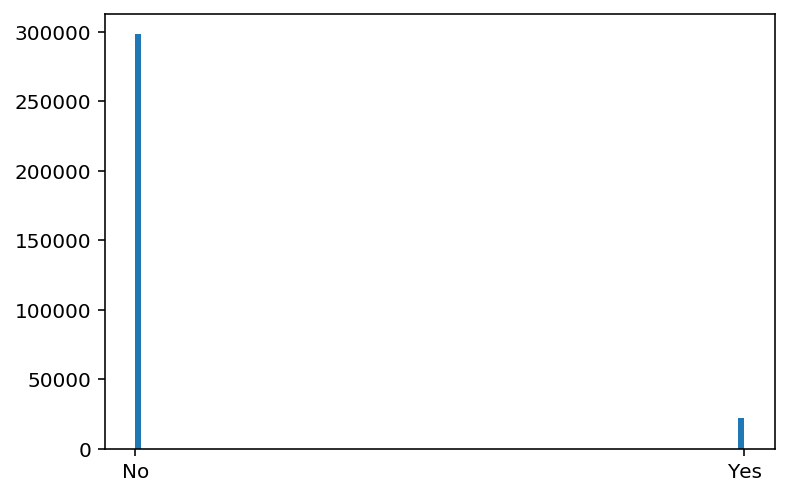

In [70]:
plt.hist(data['AlcoholDrinking'], bins=100)

In [74]:
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(X_train, y_train)
    knn_scores.append(knn_classifier.score(X_test, y_test))

NameError: name 'X_train' is not defined

ValueError: x and y must have same first dimension, but have shapes (20,) and (0,)

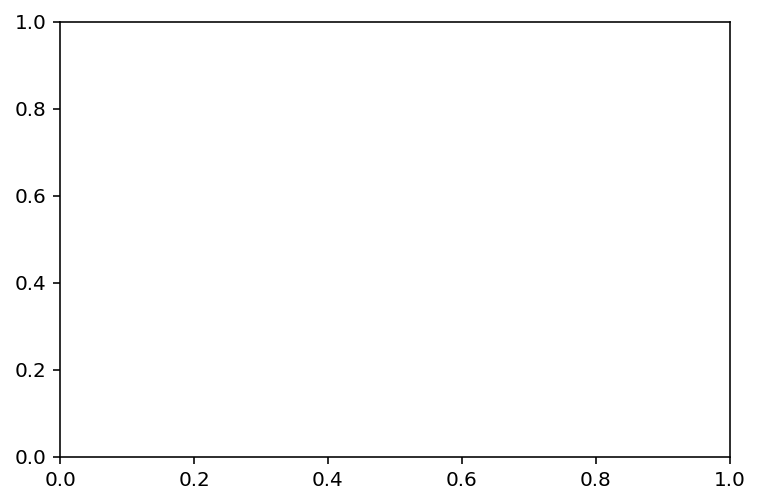

In [75]:
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [49]:
print("The score for K Neighbors Classifier is {}% with {} nieghbors.".format(knn_scores[7]*100, 8))


IndexError: list index out of range

In [121]:
import pandas as pd

data = pd.read_csv("Data/heart_2020_cleaned.csv")
data["Smoking"] = data["Smoking"].map(dict(Yes=1, No=0))
data["AlcoholDrinking"] = data["AlcoholDrinking"].map(dict(Yes=1, No=0))
data["DiffWalking"] = data["DiffWalking"].map(dict(Yes=1, No=0))
data["Stroke"] = data["Stroke"].map(dict(Yes=1, No=0))
data["Diabetic"] = data["Diabetic"].map(dict(Yes=1, No=0))
data["PhysicalActivity"] = data["PhysicalActivity"].map(dict(Yes=1, No=0))
data["Asthma"] = data["Asthma"].map(dict(Yes=1, No=0))
data["KidneyDisease"] = data["KidneyDisease"].map(dict(Yes=1, No=0))
data["SkinCancer"] = data["SkinCancer"].map(dict(Yes=1, No=0))
data["Sex"] = data["Sex"].map(dict(Female=1, Male=0))
data["HeartDisease"] = data["HeartDisease"].map(dict(Yes=1, No=0))
data["AgeCategory"] = data["AgeCategory"].map({"18-24":1, "25-29":2, "30-34":3, "35-39":4, "40-44":5, "45-49":6, "50-54":7, "55-59":8, "60-64":9, "65-69":10, "70-74":11, "75-79":12, "80 or older":13})
data["GenHealth"] = data["GenHealth"].map({"Very good":0, "Good":1, "Excellent":2, "Fair":3, "Poor":4})
data["Race"] = data["Race"].map({"White": 0, "Hispanic":1, "Black":2, "Other":3, "Asian":4, "American Indian":5, "Alaskan Native": 5})

In [122]:
data

HeartDisease    BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  \
0                  0  16.60        1                0       0             3.0   
1                  0  20.34        0                0       1             0.0   
2                  0  26.58        1                0       0            20.0   
3                  0  24.21        0                0       0             0.0   
4                  0  23.71        0                0       0            28.0   
...              ...    ...      ...              ...     ...             ...   
319790             1  27.41        1                0       0             7.0   
319791             0  29.84        1                0       0             0.0   
319792             0  24.24        0                0       0             0.0   
319793             0  32.81        0                0       0             0.0   
319794             0  46.56        0                0       0             0.0   

        MentalHealth  DiffWalking  Sex  AgeCategory  Race  Diabetic  \
0               30.0            0    1            8   0.0       1.0   
1                0.0            0    1           13   0.0       0.0   
2               30.0            0    0           10   0.0       1.0   
3                0.0            0    1           12   0.0       0.0   
4                0.0            1    1            5   0.0       0.0   
...              ...          ...  ...          ...   ...       ...   
319790           0.0            1    0            9   1.0       1.0   
319791           0.0            0    0            4   1.0       0.0   
319792           0.0            0    1            6   1.0       0.0   
319793           0.0            0    1            2   1.0       0.0   
319794           0.0            0    1           13   1.0       0.0   

        PhysicalActivity  GenHealth  SleepTime  Asthma  KidneyDisease  \
0                      1          0        5.0       1              0   
1                      1          0        7.0       0              0   
2                      1          3        8.0       1              0   
3                      0          1        6.0       0              0   
4                      1          0        8.0       0              0   
...                  ...        ...        ...     ...            ...   
319790                 0          3        6.0       1              0   
319791                 1          0        5.0       1              0   
319792                 1          1        6.0       0              0   
319793                 0          1       12.0       0              0   
319794                 1          1        8.0       0              0   

        SkinCancer  
0                1  
1                0  
2                0  
3                1  
4                0  
...            ...  
319790           0  
319791           0  
319792           0  
319793           0  
319794           0  

[319795 rows x 18 columns]

In [99]:
px.pie(data, names = "Race")

In [83]:
px.pie(data, names = "GenHealth")

SyntaxError: invalid syntax (<ipython-input-90-e15e3d087f94>, line 4)